In [39]:
from sklearn.datasets import fetch_openml 
import sklearn
import matplotlib.pyplot as plt
from sklearn import neighbors
import numpy as np
from sklearn import model_selection
import time
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.metrics import precision_score
import random as rd
from numpy import linspace
from sklearn.metrics import confusion_matrix
from sklearn.metrics import zero_one_loss
sklearn.__version__

'1.0.1'

In [40]:
mnist = fetch_openml('mnist_784')

In [20]:
#On réduit la taille du jeu de données car SVM devient très lent quand on dépasse 10000 données d'entrée
indexes = np.random.randint(70000, size=7000)
data = mnist.data.values[indexes]
target = mnist.target[indexes]


xtrain,  xtest,  ytrain,  ytest = model_selection.train_test_split(data, target, train_size = 0.7)
clf = svm.SVC(kernel="linear", verbose = True)

In [21]:
clf.fit(xtrain, ytrain)
precision_score(ytest, clf.predict(xtest), average='micro')

[LibSVM]

0.9042857142857142

In [22]:
#Precomputed ne fonctionne pas car il nécessite une forme particulière des données en entrée
noyaux = ["linear", "poly", "rbf", "sigmoid", "precomputed"] 
exec_times = []
scores_test = []
scores_training = []
xtrain,  xtest,  ytrain,  ytest = model_selection.train_test_split(data, target, train_size = 0.7)
for noyau in noyaux:
    if noyau != "precomputed":  #pour les noyaux "linear", "poly", "rbf", "sigmoid"
        start_time = time.time()
        clf = svm.SVC(kernel=noyau)
        clf.fit(xtrain, ytrain)
        predicted = precision_score(ytest, clf.predict(xtest), average='micro')
        print(f"Pour le noyau {noyau}, la précision est de {predicted} après {time.time() - start_time} secondes.")
        exec_times.append(time.time() - start_time)
        scores_training.append(clf.score(xtrain,ytrain))
        scores_test.append(clf.score(xtest,ytest))
    else:                       #pour le noyau "precomputed"
        start_time = time.time()
        clf = svm.SVC(kernel=noyau)
        clf.fit(xtrain.dot(np.transpose(xtrain)),ytrain)
        predicted = precision_score(ytest, clf.predict(xtest.dot(np.transpose(xtrain))), average='micro')
        print(f"Pour le noyau {noyau}, la précision est de {predicted} après {time.time() - start_time} secondes.")
        exec_times.append(time.time() - start_time)
        scores_training.append(clf.score(xtrain.dot(np.transpose(xtrain)),ytrain))
        scores_test.append(clf.score(xtest.dot(np.transpose(xtrain)),ytest))
#        print("Confusion matrix:\n%s" % confusion_matrix(ytest, ypred))


Pour le noyau linear, la précision est de 0.9166666666666666 après 1.1527228355407715 secondes.
Pour le noyau poly, la précision est de 0.9380952380952381 après 1.8803534507751465 secondes.
Pour le noyau rbf, la précision est de 0.950952380952381 après 3.273064613342285 secondes.
Pour le noyau sigmoid, la précision est de 0.8509523809523809 après 2.550261974334717 secondes.
Pour le noyau precomputed, la précision est de 0.9166666666666666 après 0.4244413375854492 secondes.


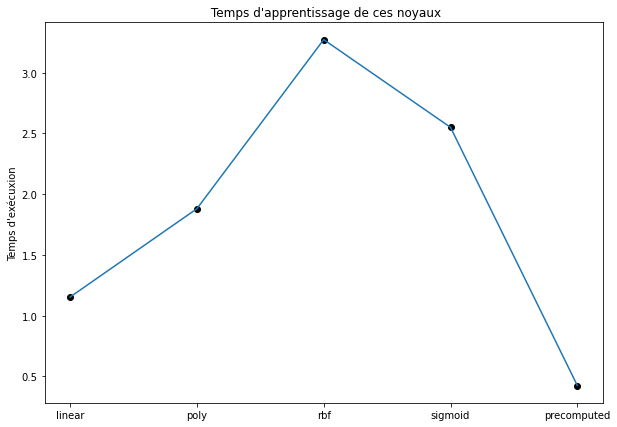

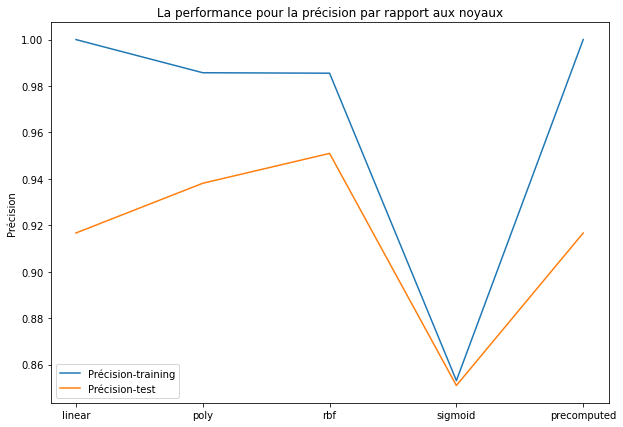

In [24]:
noyaux = ["linear", "poly", "rbf", "sigmoid", "precomputed"] 
y_pos = np.arange(len(noyaux))


plt.figure(figsize=(10,7))
plt.plot(y_pos,exec_times)
plt.scatter(noyaux, exec_times, c = 'black')
plt.title(" Temps d'apprentissage de ces noyaux")
plt.xticks(y_pos, noyaux)
plt.ylabel("Temps d'exécuxion")

plt.savefig('variationkernel1.jpg')
plt.show()

plt.figure(figsize=(10,7))
plt.subplot()
plt.plot(y_pos,scores_training,label='Précision-training')
plt.plot(y_pos,scores_test,label='Précision-test')
plt.xticks(y_pos,noyaux)
plt.ylabel('Précision')
plt.legend()
plt.title('La performance pour la précision par rapport aux noyaux')
plt.savefig('precision1.jpg')
plt.show()

Pour C = 0.1, la précision est de 0.9157142857142857 après 9.638710021972656 secondes.
Pour C = 0.2, la précision est de 0.93 après 7.883661270141602 secondes.
Pour C = 0.30000000000000004, la précision est de 0.9333333333333333 après 7.068591833114624 secondes.
Pour C = 0.4, la précision est de 0.9385714285714286 après 6.707732439041138 secondes.
Pour C = 0.5, la précision est de 0.9404761904761905 après 6.366599082946777 secondes.
Pour C = 0.6, la précision est de 0.9433333333333334 après 6.146944522857666 secondes.
Pour C = 0.7000000000000001, la précision est de 0.9457142857142857 après 5.922161817550659 secondes.
Pour C = 0.8, la précision est de 0.9480952380952381 après 5.821857929229736 secondes.
Pour C = 0.9, la précision est de 0.9495238095238095 après 5.772751808166504 secondes.
Pour C = 1.0, la précision est de 0.950952380952381 après 5.896346807479858 secondes.


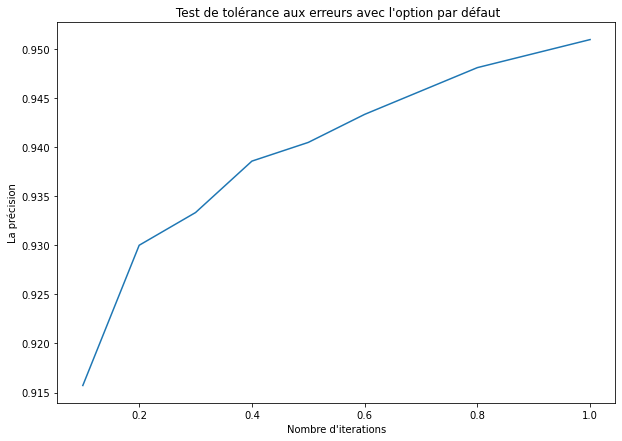

In [25]:
C = linspace(0.1, 1, 10)
test_scores = []
alltest_scores = []
noyaux = ["linear", "poly", "rbf", "sigmoid", "precomputed"] 
#Plus C est proche de 1, plus l'entrainement est rapide et meilleur est le résultat

for c in C:
    start_time = time.time()
    clf = svm.SVC(C=c)
    clf.fit(xtrain, ytrain)
    predicted = precision_score(ytest, clf.predict(xtest), average='micro')
    test_scores.append(clf.score(xtest,ytest))
    print(f"Pour C = {c}, la précision est de {predicted} après {time.time() - start_time} secondes.")

    
##PLOT
plt.figure(figsize=(10,7))
plt.plot(C,test_scores)
plt.title(" Test de tolérance aux erreurs avec l'option par défaut")
plt.ylabel("La précision")
plt.xlabel("Nombre d'iterations")

plt.show()


[[194   0   0   1   0   1   0   1   2   1]
 [  0 248   4   0   0   0   0   0   0   0]
 [  0   0 195   0   5   2   1   4   3   1]
 [  0   0   3 199   0   6   0   0   2   2]
 [  0   1   0   0 182   0   2   0   0   4]
 [  0   0   1   4   0 177   0   0   2   2]
 [  0   1   1   1   4   5 217   0   2   0]
 [  0   3   3   1   1   0   0 218   1   1]
 [  1   4   1   0   1   3   0   1 184   2]
 [  1   0   0   4   4   0   0   2   0 183]]


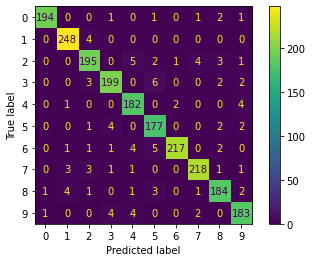

In [26]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(ytest, clf.predict(xtest))
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.savefig('matrice.jpg')
plt.show()

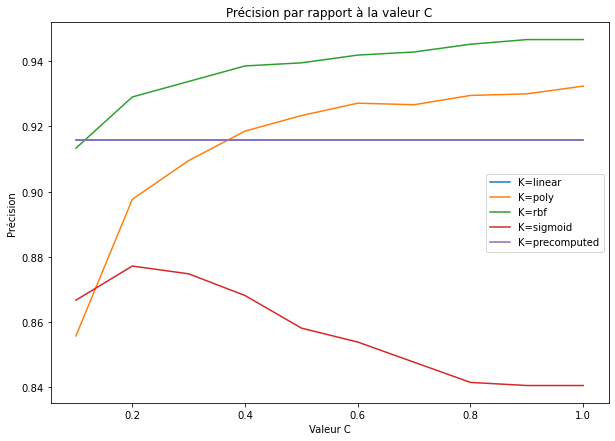

In [8]:
##Test C sur les différents noyaux 

for noyau in noyaux:
    test_scores = []
    if noyau != 'precomputed':
        for c in C : 
            clf = svm.SVC(kernel=noyau, C=c)
            clf = clf.fit(xtrain,ytrain)
            test_scores.append(clf.score(xtest,ytest))
    else:
        for c in C : 
            clf = svm.SVC(kernel=noyau, C=c)
            clf = clf.fit(xtrain.dot(np.transpose(xtrain)),ytrain)
            test_scores.append(clf.score(xtest.dot(np.transpose(xtrain)),ytest))

    alltest_scores.append(test_scores)

##PLOT

plt.figure(figsize=(10,7))
for i in range(len(noyaux)):
    plt.plot(C, alltest_scores[i],label='K={}'.format(noyaux[i]))
plt.legend()
plt.title("Précision par rapport à la valeur C")
plt.ylabel("Précision")
plt.xlabel("Valeur C")
plt.savefig('precisionC.jpg')
plt.show()


In [9]:
#error test et time test
C = linspace(0.1, 1, 10)
test_scores = []
alltest_scores = []
noyaux = ["linear", "poly", "rbf", "sigmoid", "precomputed"] 
errors_classif = []
time_spend = []
for noyau in noyaux:
    errors = []
    times = []
    if noyau != 'precomputed':   #pour les noyaux "linear", "poly", "rbf", "sigmoid"
        for c in C : 
            start_time = time.time()
            clf = svm.SVC(kernel=noyau, C=c)
            clf = clf.fit(xtrain,ytrain)
            ypred = clf.predict(xtest)
            errors.append(zero_one_loss(ypred, ytest))
            times.append(time.time() - start_time)
    else:
        for c in C :
            start_time = time.time()
            clf = svm.SVC(kernel=noyau, C=c)
            clf = clf.fit(xtrain.dot(np.transpose(xtrain)),ytrain)
            ypred = clf.predict(xtest.dot(np.transpose(xtrain)))
            errors.append(zero_one_loss(ypred, ytest))
            times.append(time.time() - start_time)
    
    errors_classif.append(errors)
    time_spend.append(times)

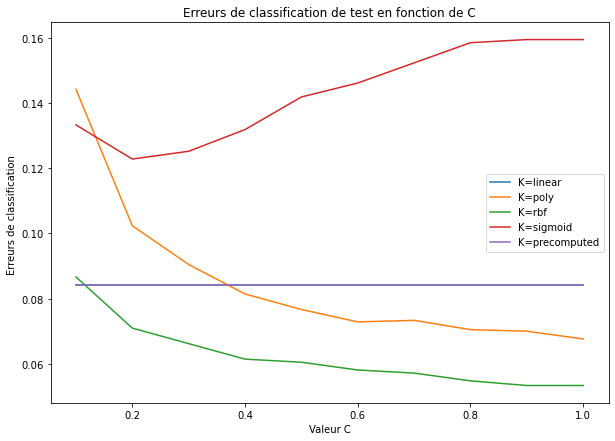

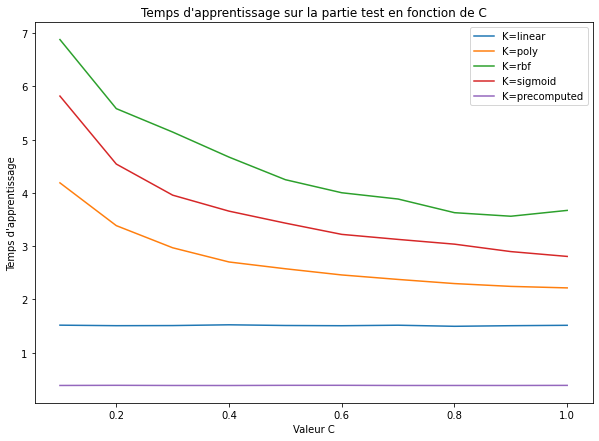

In [10]:
## PLOT error test
plt.figure(figsize=(10,7))
for i in range(len(noyaux)):
    plt.plot(C,errors_classif[i],label='K={}'.format(noyaux[i]))
plt.legend()
plt.title("Erreurs de classification de test en fonction de C")
plt.ylabel("Erreurs de classification ")
plt.xlabel("Valeur C")
plt.savefig('errortest.jpg')
plt.show()

## PLOT temps test

plt.figure(figsize=(10,7))
for i in range(len(noyaux)):
    plt.plot(C,time_spend[i],label='K={}'.format(noyaux[i]))
plt.legend()
plt.title("Temps d'apprentissage sur la partie test en fonction de C")
plt.ylabel("Temps d'apprentissage")
plt.xlabel("Valeur C")
plt.savefig('tempstest.jpg')
plt.show()



In [11]:
#error training et time training
C = linspace(0.1, 1, 10)
train_scores = []
alltrain_scores = []
noyaux = ["linear", "poly", "rbf", "sigmoid", "precomputed"] 
errors_classif = []
time_spend = []
for noyau in noyaux:
    errors = []
    times = []
    if noyau != 'precomputed':   #pour les noyaux "linear", "poly", "rbf", "sigmoid"
        for c in C : 
            start_time = time.time()
            clf = svm.SVC(kernel=noyau, C=c)
            clf = clf.fit(xtrain,ytrain)
            ypred = clf.predict(xtrain)
            errors.append(zero_one_loss(ypred, ytrain))
            times.append(time.time() - start_time)
    else:
        for c in C :
            start_time = time.time()
            clf = svm.SVC(kernel=noyau, C=c)
            clf = clf.fit(xtrain.dot(np.transpose(xtrain)),ytrain)
            ypred = clf.predict(xtrain.dot(np.transpose(xtrain)))
            errors.append(zero_one_loss(ypred, ytrain))
            times.append(time.time() - start_time)
    
    errors_classif.append(errors)
    time_spend.append(times)

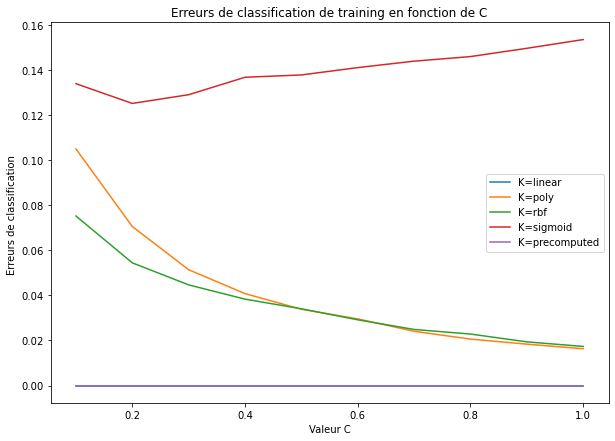

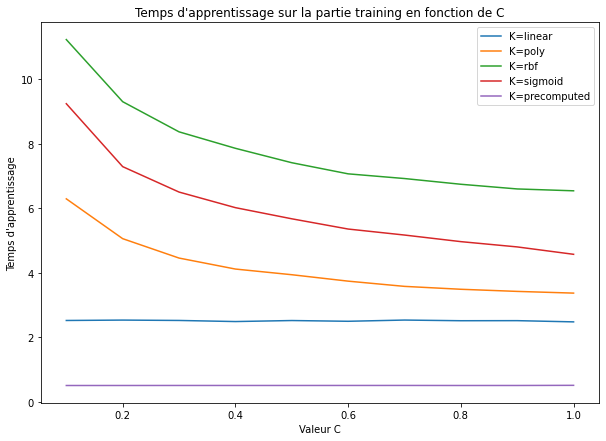

In [12]:
## PLOT error training
plt.figure(figsize=(10,7))
for i in range(len(noyaux)):
    plt.plot(C,errors_classif[i],label='K={}'.format(noyaux[i]))
plt.legend()
plt.title("Erreurs de classification de training en fonction de C")
plt.ylabel("Erreurs de classification ")
plt.xlabel("Valeur C")
plt.savefig('errortrain.jpg')
plt.show()

## PLOT temps training

plt.figure(figsize=(10,7))
for i in range(len(noyaux)):
    plt.plot(C,time_spend[i],label='K={}'.format(noyaux[i]))
plt.legend()
plt.title("Temps d'apprentissage sur la partie training en fonction de C")
plt.ylabel("Temps d'apprentissage")
plt.xlabel("Valeur C")
plt.savefig('tempstrain.jpg')
plt.show()

In [17]:
#Comparaison des 3 méthodes por différentes tailles de jeux de données
#On garde des jeux de données de taille réduite pour éviter de perdre trop de temps

debut = 1
fin = 5
pas = 1

for nn in range(debut,fin,pas):
    
    sizes = [500,1000,2000,3000,4000,5000,6000,7000]
    precisions_KNN = [-1 for i in range(8)]
    precisions_MLP = [-1 for i in range(8)]
    precisions_SVM = [-1 for i in range(8)]
    temps_KNN = [-1 for i in range(8)]
    temps_MLP = [-1 for i in range(8)]
    temps_SVM = [-1 for i in range(8)]
    predictions_KNN = [-1 for i in range(8)]
    predictions_MLP = [-1 for i in range(8)]
    predictions_SVM = [-1 for i in range(8)]
    for i,size in enumerate(sizes):

        indexes = np.random.randint(70000, size=size)
        data = mnist.data.values[indexes]
        target = mnist.target[indexes]


        xtrain,  xtest,  ytrain,  ytest = model_selection.train_test_split(data, target, train_size = 0.7)



        temps_debut = time.time()
        MLP = MLPClassifier(hidden_layer_sizes = tuple([50]*15), alpha = 0.8, solver='adam').fit(xtrain,ytrain)
        temps_MLP[i-debut] = time.time() - temps_debut
        temps_debut = time.time()
        KNN = neighbors.KNeighborsClassifier(n_neighbors = 3, p = 13, n_jobs = -1).fit(xtrain,ytrain)
        temps_KNN[i-debut] = time.time() - temps_debut
        temps_debut = time.time()
        SVM = svm.SVC(kernel="rbf", C = 1).fit(xtrain,ytrain)
        temps_SVM[i-debut] = time.time() - temps_debut
        
        predictions_KNN[i-debut] = KNN.predict(xtest)
        predictions_MLP[i-debut] = MLP.predict(xtest)
        predictions_SVM[i-debut] = SVM.predict(xtest)
        

        precisions_KNN[i-debut] = precision_score(ytest, predictions_KNN[i-debut], average='micro')
        precisions_MLP[i-debut] = precision_score(ytest, predictions_MLP[i-debut], average='micro')
        precisions_SVM[i-debut] = precision_score(ytest, predictions_SVM[i-debut], average='micro')
    print(f"Avancement: {nn}")
    total.append((precisions_KNN,precisions_MLP,precisions_SVM,temps_KNN,temps_MLP,temps_SVM,predictions_KNN[i-debut],predictions_MLP[i-debut],predictions_KNN[i-debut]))
        


C:\Users\Marin\anaconda3\envs\projet_integrateur\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Avancement: 7%


C:\Users\Marin\anaconda3\envs\projet_integrateur\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Avancement: 7%


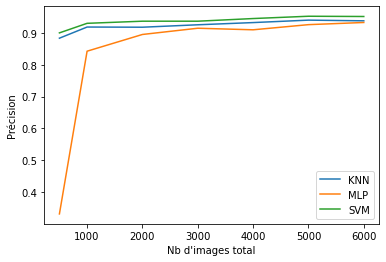

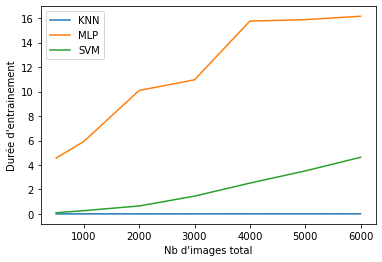

In [38]:
rr = 2
precisions_KNN = np.array([0]*8)
precisions_MLP = np.array([0]*8)
precisions_SVM = np.array([0]*8)
temps_KNN = np.array([0]*8)
temps_MLP = np.array([0]*8)
temps_SVM = np.array([0]*8)

for e in total:
    precisions_KNN = precisions_KNN + np.array(e[0])
    precisions_MLP = precisions_MLP + np.array(e[1])
    precisions_SVM = precisions_SVM + np.array(e[2])
    temps_KNN = temps_KNN + np.array(e[3])
    temps_MLP = temps_MLP + np.array(e[4])
    temps_SVM = temps_SVM + np.array(e[5])

precisions_KNN = precisions_KNN/rr
precisions_MLP = precisions_MLP /rr
precisions_SVM = precisions_SVM /rr
temps_KNN = temps_KNN /rr
temps_MLP = temps_MLP /rr
temps_SVM = temps_SVM /rr
    
    
plt.plot([500,1000,2000,3000,4000,5000,6000], precisions_KNN[:-1], label = "KNN")
plt.plot([500,1000,2000,3000,4000,5000,6000], precisions_MLP[:-1], label = "MLP")
plt.plot([500,1000,2000,3000,4000,5000,6000], precisions_SVM[:-1], label = "SVM")
plt.legend()
plt.ylabel("Précision")
plt.xlabel("Nb d'images total")
plt.savefig("1.png")
plt.show()

plt.plot([500,1000,2000,3000,4000,5000,6000], temps_KNN[:-1], label = "KNN")
plt.plot([500,1000,2000,3000,4000,5000,6000], temps_MLP[:-1], label = "MLP")
plt.plot([500,1000,2000,3000,4000,5000,6000], temps_SVM[:-1], label = "SVM")
plt.legend()
plt.ylabel("Durée d'entrainement")
plt.xlabel("Nb d'images total")
plt.savefig("2.png")
plt.show()
